In [98]:
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [99]:
from tensorflow.keras.datasets import reuters

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [103]:
#모든단어(30981), 5000, 10000, 20000

In [104]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [105]:
print(max([max(seq) for seq in x_train]))

30981


In [106]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [107]:
len(word_index)

30979

In [108]:
index_to_word = { index : word for word, index in word_index.items()}

In [109]:
index_to_word[1]

'the'

In [110]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>","<unused>")):
  index_to_word[index]=token

In [111]:
def decoding(x_train):
  decoded = []
  for i in range(len(x_train)):
      t = ' '.join([index_to_word[index] for index in x_train[i]])
      decoded.append(t)
  return decoded

In [112]:
def CNB_GBT(num_words,randomstate=42):
  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
  x_train_decode = decoding(x_train)
  x_test_decode = decoding(x_test)
  dtmvector = CountVectorizer()
  x_train_dtm = dtmvector.fit_transform(x_train_decode)
  x_test_dtm = dtmvector.transform(x_test_decode)
  tfidf_transformer = TfidfTransformer()
  x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
  x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

  cb = ComplementNB()
  cb.fit(x_train_tfidf, y_train)
  predicted1 = cb.predict(x_test_tfidf)

  grbt = GradientBoostingClassifier(random_state=randomstate)
  grbt.fit(x_train_tfidf, y_train)
  predicted2 = grbt.predict(x_test_tfidf)

  return predicted1, predicted2, y_test

In [113]:
num_words_list=[5000, 10000, 20000, None]

In [114]:
from tqdm.notebook import tqdm

In [115]:
# CNB 지표 리스트
accuracy_cnb = []
precision_macro_cnb = []
precision_weighted_cnb = []
recall_macro_cnb = []
recall_weighted_cnb = []
f1_macro_cnb = []
f1_weighted_cnb = []
report_cnb = []

# GRBT 지표 리스트
accuracy_grbt = []
precision_macro_grbt = []
precision_weighted_grbt = []
recall_macro_grbt = []
recall_weighted_grbt = []
f1_macro_grbt = []
f1_weighted_grbt = []
report_grbt = []

for num_words in tqdm(num_words_list, desc="Evaluating models"):
  cnbpred, grbtpred, y_test = CNB_GBT(num_words)

  # -- CNB 측정 --
  accuracy_cnb.append(accuracy_score(y_test, cnbpred))
  precision_macro_cnb.append(precision_score(y_test, cnbpred, average='macro', zero_division=0))
  precision_weighted_cnb.append(precision_score(y_test, cnbpred, average='weighted', zero_division=0))
  recall_macro_cnb.append(recall_score(y_test, cnbpred, average='macro', zero_division=0))
  recall_weighted_cnb.append(recall_score(y_test, cnbpred, average='weighted', zero_division=0))
  f1_macro_cnb.append(f1_score(y_test, cnbpred, average='macro', zero_division=0))
  f1_weighted_cnb.append(f1_score(y_test, cnbpred, average='weighted', zero_division=0))
  report_cnb.append(classification_report(y_test, cnbpred, zero_division=0))

  # -- GRBT 측정 --
  accuracy_grbt.append(accuracy_score(y_test, grbtpred))
  precision_macro_grbt.append(precision_score(y_test, grbtpred, average='macro', zero_division=0))
  precision_weighted_grbt.append(precision_score(y_test, grbtpred, average='weighted', zero_division=0))
  recall_macro_grbt.append(recall_score(y_test, grbtpred, average='macro', zero_division=0))
  recall_weighted_grbt.append(recall_score(y_test, grbtpred, average='weighted', zero_division=0))
  f1_macro_grbt.append(f1_score(y_test, grbtpred, average='macro', zero_division=0))
  f1_weighted_grbt.append(f1_score(y_test, grbtpred, average='weighted', zero_division=0))
  report_grbt.append(classification_report(y_test, grbtpred, zero_division=0))

  print(f"[num_words={num_words}] done")

Evaluating models:   0%|          | 0/4 [00:00<?, ?it/s]

[num_words=5000] done
[num_words=10000] done
[num_words=20000] done
[num_words=None] done


In [116]:
def plot_metrics(accuracy,
                 precision_macro, precision_weighted,
                 recall_macro, recall_weighted,
                 f1_macro, f1_weighted):

  plt.figure(figsize=(14, 10))

  num_words_list=[5000,10000,20000,30979]

  # Accuracy
  plt.subplot(2, 2, 1)
  plt.plot(num_words_list, accuracy, marker='o', label='Accuracy')
  plt.title('Accuracy')
  plt.ylim(0, 1)
  plt.grid(True)
  plt.xlabel('num_words')
  plt.ylabel('Score')
  plt.legend()

  # Precision
  plt.subplot(2, 2, 2)
  plt.plot(num_words_list, precision_macro, marker='o', label='Precision (macro)')
  plt.plot(num_words_list, precision_weighted, marker='o', label='Precision (weighted)')
  plt.title('Precision')
  plt.ylim(0, 1)
  plt.grid(True)
  plt.xlabel('num_words')
  plt.ylabel('Score')
  plt.legend()

  # Recall
  plt.subplot(2, 2, 3)
  plt.plot(num_words_list, recall_macro, marker='o', label='Recall (macro)')
  plt.plot(num_words_list, recall_weighted, marker='o', label='Recall (weighted)')
  plt.title('Recall')
  plt.ylim(0, 1)
  plt.grid(True)
  plt.xlabel('num_words')
  plt.ylabel('Score')
  plt.legend()

  # F1 Score
  plt.subplot(2, 2, 4)
  plt.plot(num_words_list, f1_macro, marker='o', label='F1 Score (macro)')
  plt.plot(num_words_list, f1_weighted, marker='o', label='F1 Score (weighted)')
  plt.title('F1 Score')
  plt.ylim(0, 1)
  plt.grid(True)
  plt.xlabel('num_words')
  plt.ylabel('Score')
  plt.legend()

  plt.tight_layout()
  plt.show()

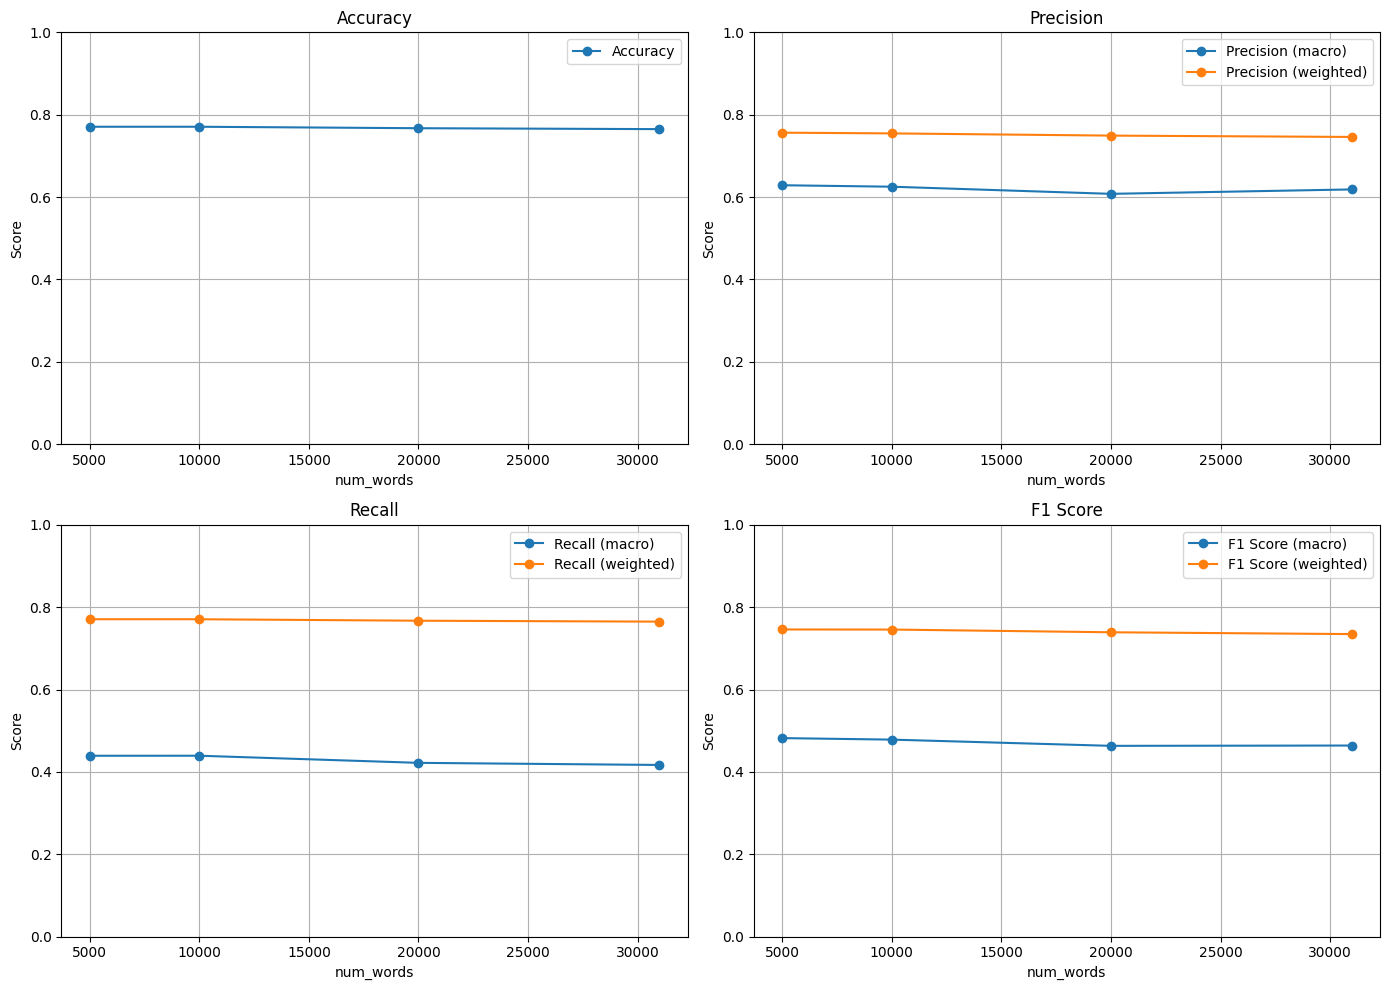

In [117]:
plot_metrics( accuracy_cnb,
                 precision_macro_cnb, precision_weighted_cnb,
                 recall_macro_cnb, recall_weighted_cnb,
                 f1_macro_cnb, f1_weighted_cnb)

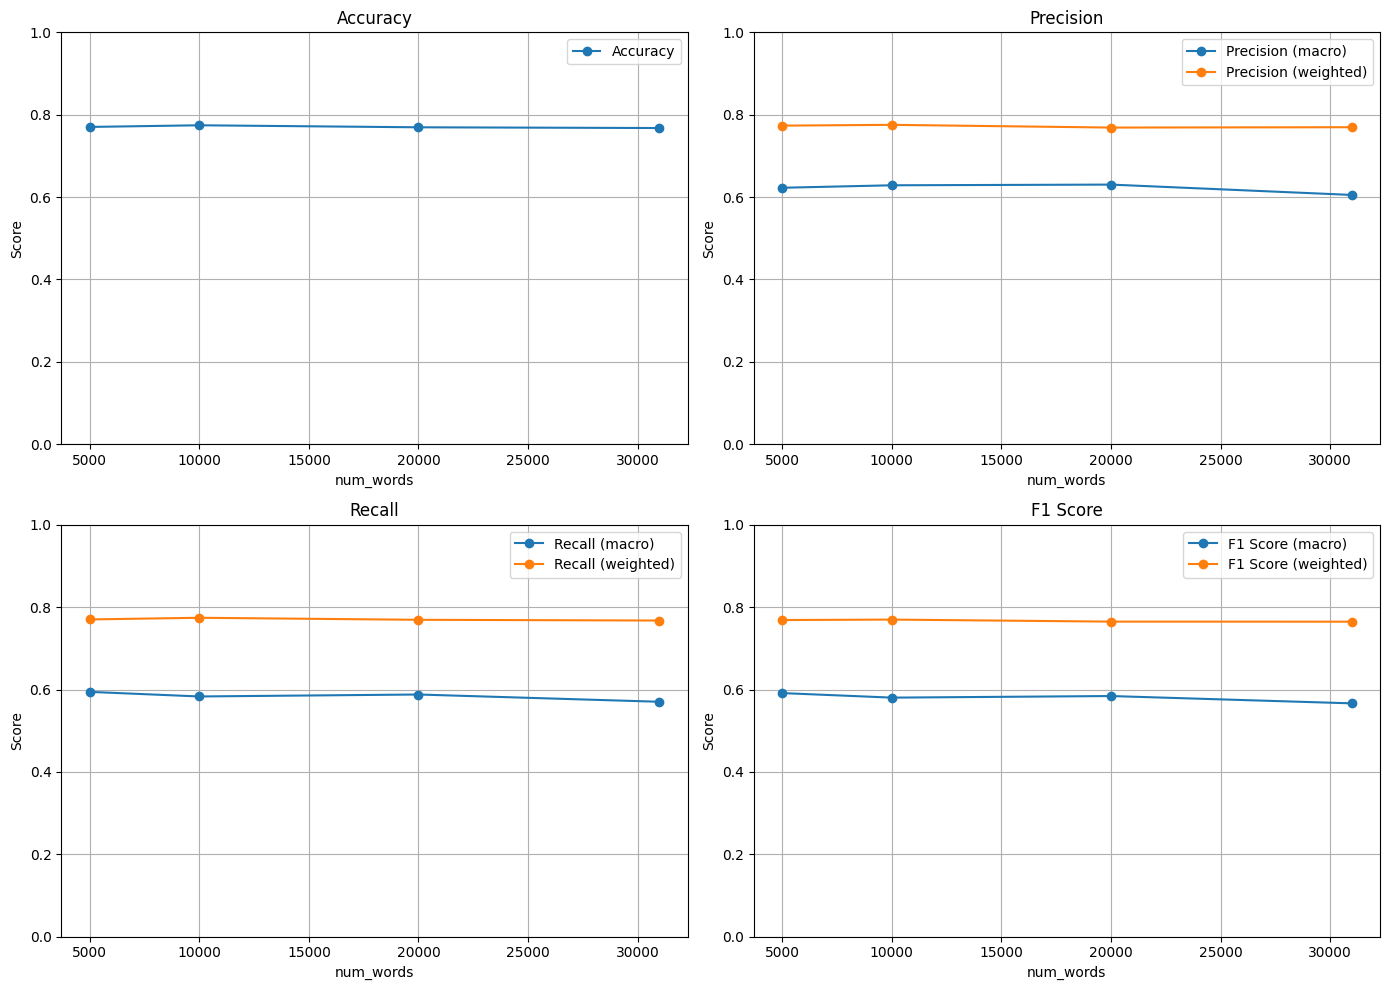

In [118]:
plot_metrics(accuracy_grbt,
                 precision_macro_grbt, precision_weighted_grbt,
                 recall_macro_grbt, recall_weighted_grbt,
                 f1_macro_grbt, f1_weighted_grbt)

In [131]:
f1_macro_grbt

[0.5913637933098609,
 0.5803405396026758,
 0.5842021342080708,
 0.5664567641363957]

In [132]:
f1_weighted_grbt

[0.7687794246974134,
 0.7698855629397113,
 0.7649273177013718,
 0.7647957141787202]

In [130]:
accuracy_grbt

[0.7702582368655387, 0.7742653606411398, 0.7693677649154052, 0.767586821015138]

#1.report

In [119]:
print(report_cnb[0])

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

In [120]:
print(report_cnb[1])

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.75      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.58      0.59      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.79      0.73        99
          17       0.00    

In [121]:
print(report_cnb[2])

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.64      0.89      0.74       105
           2       0.91      0.50      0.65        20
           3       0.89      0.91      0.90       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.44      0.11      0.17        38
           9       0.82      0.92      0.87        25
          10       0.96      0.73      0.83        30
          11       0.54      0.70      0.61        83
          12       0.00      0.00      0.00        13
          13       0.61      0.54      0.57        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

In [122]:
print(report_cnb[3])

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

In [123]:
print(report_grbt[0])

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.81      0.69      0.74       105
           2       0.75      0.75      0.75        20
           3       0.89      0.91      0.90       813
           4       0.75      0.82      0.79       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.33      0.33      0.33         3
           8       0.62      0.63      0.62        38
           9       0.91      0.84      0.88        25
          10       0.87      0.87      0.87        30
          11       0.63      0.69      0.66        83
          12       0.46      0.46      0.46        13
          13       0.56      0.51      0.54        37
          14       0.08      0.50      0.13         2
          15       0.33      0.22      0.27         9
          16       0.70      0.75      0.72        99
          17       0.40    

In [124]:
print(report_grbt[1])

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.76      0.70      0.73       105
           2       0.78      0.70      0.74        20
           3       0.89      0.91      0.90       813
           4       0.76      0.85      0.81       474
           5       0.25      0.20      0.22         5
           6       0.71      0.86      0.77        14
           7       1.00      0.33      0.50         3
           8       0.66      0.66      0.66        38
           9       0.81      0.84      0.82        25
          10       0.86      0.80      0.83        30
          11       0.62      0.67      0.64        83
          12       0.39      0.54      0.45        13
          13       0.70      0.57      0.63        37
          14       0.12      0.50      0.20         2
          15       0.17      0.11      0.13         9
          16       0.71      0.69      0.70        99
          17       0.40    

In [125]:
print(report_grbt[2])

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.71      0.75       105
           2       0.65      0.75      0.70        20
           3       0.87      0.91      0.89       813
           4       0.77      0.84      0.81       474
           5       1.00      0.20      0.33         5
           6       0.91      0.71      0.80        14
           7       1.00      0.67      0.80         3
           8       0.62      0.63      0.62        38
           9       0.90      0.76      0.83        25
          10       0.86      0.80      0.83        30
          11       0.63      0.67      0.65        83
          12       0.46      0.46      0.46        13
          13       0.59      0.43      0.50        37
          14       0.10      0.50      0.17         2
          15       0.38      0.33      0.35         9
          16       0.72      0.71      0.71        99
          17       0.38    

In [126]:
print(report_grbt[3])

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.80      0.68      0.73       105
           2       0.59      0.65      0.62        20
           3       0.88      0.91      0.89       813
           4       0.77      0.85      0.81       474
           5       1.00      0.20      0.33         5
           6       0.83      0.71      0.77        14
           7       0.50      0.33      0.40         3
           8       0.63      0.63      0.63        38
           9       0.76      0.76      0.76        25
          10       0.80      0.80      0.80        30
          11       0.62      0.63      0.62        83
          12       0.50      0.46      0.48        13
          13       0.62      0.49      0.55        37
          14       0.00      0.00      0.00         2
          15       0.17      0.11      0.13         9
          16       0.72      0.69      0.70        99
          17       0.83    

#2.1D conv

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [133]:
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

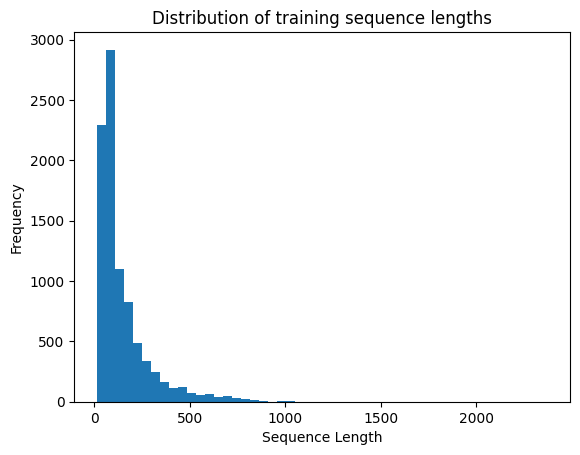

In [35]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in x_train_full]
plt.hist(sequence_lengths, bins=50)
plt.title('Distribution of training sequence lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [36]:
length=pd.DataFrame(sequence_lengths)

In [37]:
length[length[0]>900]

,0
711,1032
1654,904
2043,2246
3124,1053
4204,1035
5094,971
5844,907
5915,907
6645,972
8167,915


In [42]:
len(set(y_train_full))

46

In [59]:
all_sequences = np.concatenate([x_train_full, x_test], axis=0)
all_tokens = np.concatenate(all_sequences)

unique_tokens = np.unique(all_tokens)

print("실제 사용된 단어 인덱스 개수:", len(unique_tokens))
print("최솟값:", np.min(unique_tokens))
print("최댓값:", np.max(unique_tokens))

실제 사용된 단어 인덱스 개수: 9998
최솟값: 1
최댓값: 9999


In [56]:
all_tokens = np.concatenate(x_train_full)
unique_tokens = np.unique(all_tokens)

print("고유 인덱스 개수 (실제 vocab size 추정):", len(unique_tokens))
print("최솟값:", np.min(unique_tokens))
print("최댓값:", np.max(unique_tokens))

고유 인덱스 개수 (실제 vocab size 추정): 9982
최솟값: 1
최댓값: 9999


In [60]:
full_range = set(range(np.max(unique_tokens) + 1))

# 실제 사용된 인덱스 집합
used_indices = set(unique_tokens)

# 사용되지 않은 인덱스
unused_indices = sorted(list(full_range - used_indices))

print("사용되지 않은 인덱스 개수:", len(unused_indices))
print("사용되지 않은 인덱스들:", unused_indices[:20], "...")

사용되지 않은 인덱스 개수: 2
사용되지 않은 인덱스들: [0, 3] ...


In [82]:
index_to_word[3]

'<unused>'

In [134]:
maxlen = 1000  # 분포 보고 적절히 조정
x_train_full_pad = pad_sequences(x_train_full, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# 4. train/validation 분리 (validation 비율: 0.2)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full_pad, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# 5. class weight 계산 (y_train 기준)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))  # keras에 넘기려면 dict 형태

# 6. tf.data.Dataset 구성
batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_pad, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [135]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model

max_len=1000
vocab_size=5000
embedding_dim=128

input_ = Input(shape=(max_len,))
x = Embedding(vocab_size, embedding_dim)(input_)

conv3 = GlobalMaxPooling1D()(Conv1D(128, 3, activation='relu')(x))
conv4 = GlobalMaxPooling1D()(Conv1D(128, 4, activation='relu')(x))
conv5 = GlobalMaxPooling1D()(Conv1D(128, 5, activation='relu')(x))

x = Concatenate()([conv3, conv4, conv5])
x = Dense(64, activation='relu')(x)
output = Dense(46, activation='softmax')(x)

model = Model(inputs=input_, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1000, 128) │    640,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 998, 128)  │     49,280 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 997, 128)  │     65,664 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 996, 128)  │     82,048 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_9[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_10[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_11[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │     24,640 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 46)        │      2,990 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 864,622 (3.30 MB)

 Trainable params: 864,622 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

In [143]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [144]:
from tensorflow.keras.optimizers import Adam

learning_rate = 8e-4
optimizer = Adam(learning_rate=learning_rate)

In [138]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.0085 - loss: 3.6247 - val_accuracy: 0.2588 - val_loss: 3.7773 - learning_rate: 5.0000e-04
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3185 - loss: 3.7769 - val_accuracy: 0.3133 - val_loss: 3.3521 - learning_rate: 5.0000e-04
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3687 - loss: 3.3988 - val_accuracy: 0.5114 - val_loss: 2.6918 - learning_rate: 5.0000e-04
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5550 - loss: 2.6757 - val_accuracy: 0.6110 - val_loss: 2.1358 - learning_rate: 5.0000e-04
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6615 - loss: 1.8985 - val_accuracy: 0.6422 - val_loss: 1.7365 - learning_rate: 5.0000e-04
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7026 - loss: 1.1239 - val_accuracy: 0.6917 - val_loss: 1.4556 - learning_rate: 5.0000e-04
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - ac

In [139]:
deeppred= model.predict(test_dataset)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [140]:
deeppred=np.argmax(deeppred, axis=1)

In [141]:
print(classification_report(y_test, deeppred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.70      0.75      0.72       105
           2       0.70      0.80      0.74        20
           3       0.94      0.87      0.90       813
           4       0.81      0.86      0.84       474
           5       0.00      0.00      0.00         5
           6       0.88      1.00      0.93        14
           7       0.67      0.67      0.67         3
           8       0.69      0.71      0.70        38
           9       0.82      0.92      0.87        25
          10       0.88      0.97      0.92        30
          11       0.62      0.64      0.63        83
          12       0.57      0.62      0.59        13
          13       0.60      0.70      0.65        37
          14       0.29      1.00      0.44         2
          15       0.75      0.33      0.46         9
          16       0.72      0.79      0.75        99
          17       0.78    

#3.lstm

In [173]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout

vocab_size = 5000
embedding_dim = 128
lstm_units = 128

input_ = Input(shape=(None,), name='input')
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True)(input_)

x = LSTM(lstm_units, return_sequences=False)(x)
#x = Dropout(0.3)(x)
#x = Dense(64, activation='relu')(x)

output = Dense(46, activation='softmax')(x)

model2 = Model(inputs=input_, outputs=output)

model2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, None, 128) │    640,000 │ input[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_7         │ (None, None)      │          0 │ input[0][0]       │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 128)       │    131,584 │ embedding_11[0][… │
│                     │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 46)        │      5,934 │ lstm_7[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 777,518 (2.97 MB)

 Trainable params: 777,518 (2.97 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [175]:
from tensorflow.keras.optimizers import Adam

learning_rate = 8e-4
optimizer = Adam(learning_rate=learning_rate)

In [176]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.0520 - loss: 3.8438 - val_accuracy: 0.1708 - val_loss: 3.3953 - learning_rate: 8.0000e-04
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2357 - loss: 3.6212 - val_accuracy: 0.0234 - val_loss: 3.4121 - learning_rate: 8.0000e-04
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.1377 - loss: 3.4870 - val_accuracy: 0.3317 - val_loss: 3.1539 - learning_rate: 8.0000e-04
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2572 - loss: 3.2629 - val_accuracy: 0.2421 - val_loss: 3.0709 - learning_rate: 8.0000e-04
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3270 - loss: 2.8834 - val_accuracy: 0.3439 - val_loss: 2.6823 - learning_rate: 8.0000e-04
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4406 - loss: 2.4651 - val_accuracy: 0.4446 - val_loss: 2.2806 - learning_rate: 8.0000e-04
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc

In [177]:
deeppred= model2.predict(test_dataset)
deeppred=np.argmax(deeppred, axis=1)
print(classification_report(y_test, deeppred, zero_division=0))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.18      0.25      0.21        12
           1       0.47      0.53      0.50       105
           2       0.52      0.60      0.56        20
           3       0.90      0.81      0.85       813
           4       0.78      0.76      0.77       474
           5       0.00      0.00      0.00         5
           6       0.50      0.50      0.50        14
           7       0.50      0.33      0.40         3
           8       0.38      0.53      0.44        38
           9       0.54      0.56      0.55        25
          10       0.68      0.50      0.58        30
          11       0.29      0.37      0.32        83
          12       0.20      0.62      0.30        13
          13       0.27      0.35      0.31        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.53      0.49      0.

#4.dense

In [271]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
x_train_decode = decoding(x_train)
x_test_decode = decoding(x_test)
dtmvector = CountVectorizer()

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_decode, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

x_train_dtm = dtmvector.fit_transform(x_train_split)
x_val_dtm = dtmvector.transform(x_val_split)
x_test_dtm = dtmvector.transform(x_test_decode)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_val_tfidf = tfidf_transformer.transform(x_val_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)
x_train_dense = x_train_tfidf.toarray()
x_val_dense = x_val_tfidf.toarray()
x_test_dense = x_test_tfidf.toarray()

In [263]:
x_train_dense.shape[1]

24356

In [272]:
input_ = Input(shape=(x_train_dense.shape[1],), name='input')
x = Dense(128,activation='relu')(input_)
x = Dropout(0.3)(x)
x = Dense(64,activation='relu')(x)
output = Dense(46, activation='softmax')(x)

model3 = Model(inputs=input_, outputs=output)

model3.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 4866)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │       622,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,222 (2.42 MB)

 Trainable params: 634,222 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [273]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [274]:
from tensorflow.keras.optimizers import Adam

learning_rate = 8e-4
optimizer = Adam(learning_rate=learning_rate)

In [275]:
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model3.fit(x_train_dense, y_train_split,
           validation_data=(x_val_dense, y_val_split),
           epochs=20, batch_size=64,
           class_weight=class_weights,
           callbacks=[early_stop, lr_reduce])

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3305 - loss: 3.5474 - val_accuracy: 0.6733 - val_loss: 3.3330 - learning_rate: 8.0000e-04
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6695 - loss: 3.5007 - val_accuracy: 0.7496 - val_loss: 2.0793 - learning_rate: 8.0000e-04
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7340 - loss: 2.5058 - val_accuracy: 0.7251 - val_loss: 1.6507 - learning_rate: 8.0000e-04
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7624 - loss: 1.5793 - val_accuracy: 0.7212 - val_loss: 1.4900 - learning_rate: 8.0000e-04
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7736 - loss: 1.0015 - val_accuracy: 0.7896 - val_loss: 1.1253 - learning_rate: 8.0000e-04
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8137 - loss: 0.7675 - val_accuracy: 0.7941 - val_loss: 1.0511 - learning_rate: 8.0000e-04
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy:

In [276]:
deeppred= model3.predict(x_test_dense)
deeppred=np.argmax(deeppred, axis=1)
print(classification_report(y_test, deeppred, zero_division=0))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.73      0.78      0.75       105
           2       0.80      0.80      0.80        20
           3       0.94      0.91      0.92       813
           4       0.87      0.87      0.87       474
           5       0.20      0.20      0.20         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.53      0.71      0.61        38
           9       0.79      0.92      0.85        25
          10       0.89      0.83      0.86        30
          11       0.67      0.70      0.69        83
          12       0.47      0.54      0.50        13
          13       0.64      0.76      0.69        37
          14       0.20      0.50      0.29         2
          15       0.50      0.11      0.18         9
          16       0.74      0.77      0.7

In [270]:
deeppred2= model3.predict(x_test_dense)
deeppred2=np.argmax(deeppred2, axis=1)
print(classification_report(y_test, deeppred2, zero_division=0))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.66      0.75      0.71       105
           2       0.80      0.80      0.80        20
           3       0.93      0.90      0.92       813
           4       0.80      0.86      0.83       474
           5       0.17      0.20      0.18         5
           6       0.92      0.86      0.89        14
           7       0.67      0.67      0.67         3
           8       0.68      0.71      0.69        38
           9       0.86      0.96      0.91        25
          10       0.96      0.83      0.89        30
          11       0.65      0.66      0.66        83
          12       0.43      0.46      0.44        13
          13       0.62      0.62      0.62        37
          14       0.17      0.50      0.25         2
          15       0.75      0.33      0.46         9
          16       0.71      0.76      0.7

In [280]:
report_1 = classification_report(y_test, deeppred, output_dict=True)
report_2 = classification_report(y_test, deeppred2, output_dict=True)

df1 = pd.DataFrame(report_1).T
df2 = pd.DataFrame(report_2).T

class_ids = [str(i) for i in range(46)]
df1_class = df1.loc[class_ids, ["f1-score"]].astype(float)
df2_class = df2.loc[class_ids, ["f1-score"]].astype(float)

df1_class.columns = ["f1_5000"]
df2_class.columns = ["f1_None"]

f1_compare = pd.concat([df1_class, df2_class], axis=1)
f1_compare["delta"] = f1_compare["f1_None"] - f1_compare["f1_5000"]

In [303]:
from collections import Counter
class_counts = dict(Counter(y_train))

# 2. sample_count 열 추가
f1_compare["sample_count"] = f1_compare.index.to_series().apply(lambda x: class_counts.get(int(x), 0))

# 3. sample_count 기준 정렬
f1_sorted = f1_compare.sort_values(by="sample_count", ascending=False)

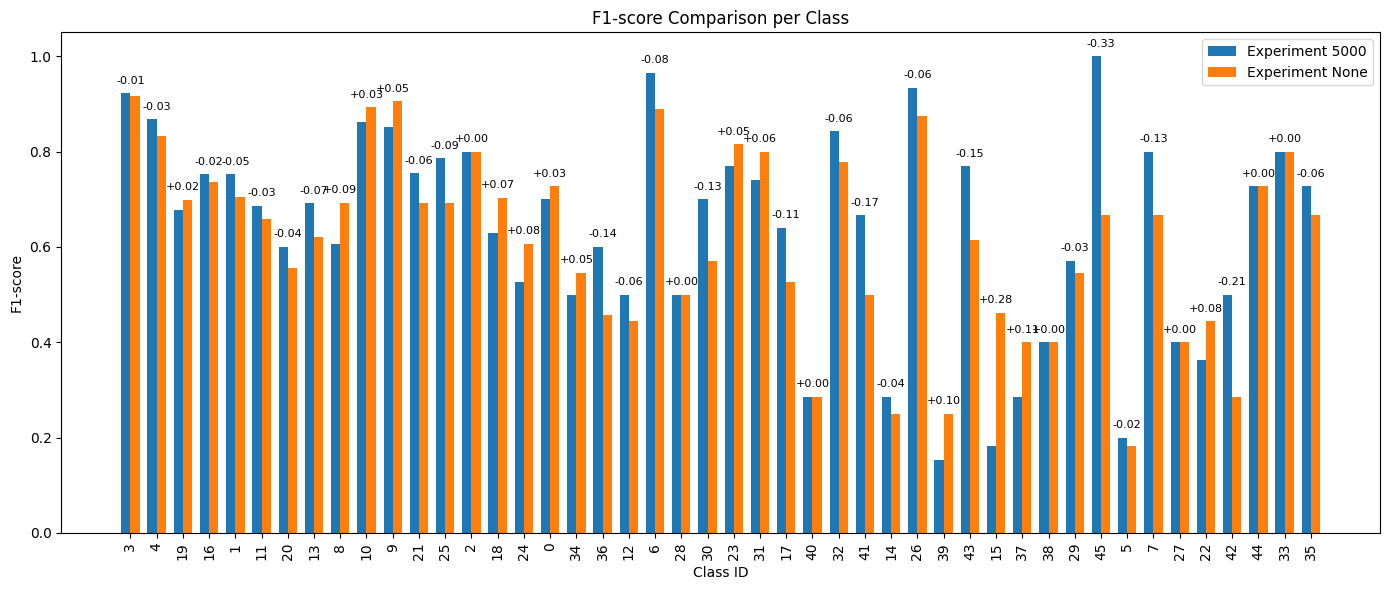

In [307]:
bar_width = 0.35
index = range(len(f1_sorted))
sorted_class_ids = f1_sorted.index.tolist()
fig, ax = plt.subplots(figsize=(14, 6))

# 실험 1, 2 F1-score 막대
ax.bar(index, f1_sorted["f1_5000"], bar_width, label='Experiment 5000')
ax.bar([i + bar_width for i in index], f1_sorted["f1_None"], bar_width, label='Experiment None')

# delta 수치 위에 표시
for i, d in enumerate(f1_sorted["delta"]):
    y_max = max(f1_sorted.iloc[i]["f1_5000"], f1_sorted.iloc[i]["f1_None"])
    ax.text(i + bar_width / 2, y_max + 0.02, f"{d:+.2f}", ha='center', fontsize=8)

# 시각 설정
ax.set_xlabel('Class ID')
ax.set_ylabel('F1-score')
ax.set_title('F1-score Comparison per Class')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([str(cls_id) for cls_id in sorted_class_ids], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

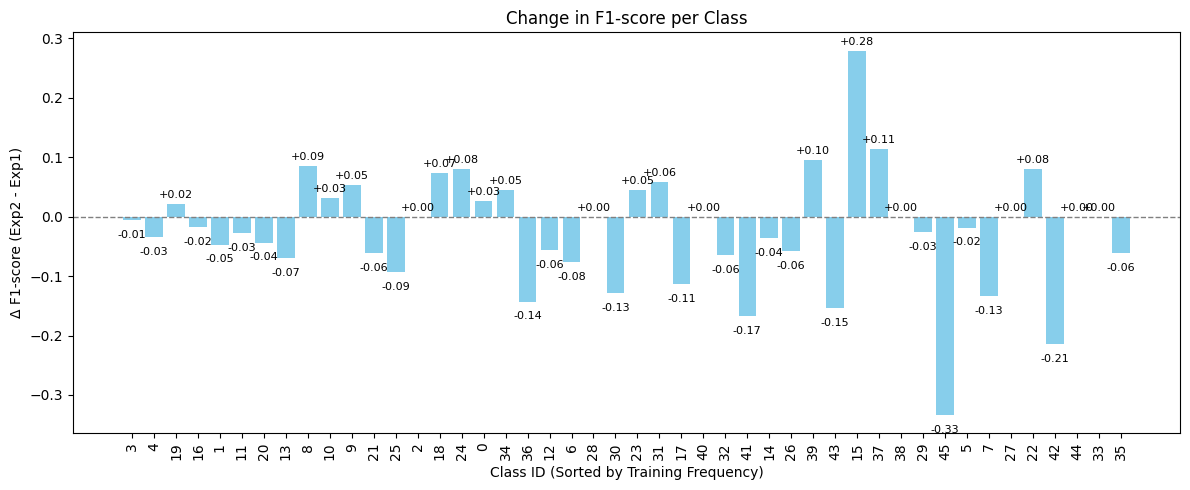

In [308]:
sorted_class_ids = f1_sorted.index.tolist()
index = range(len(f1_sorted))

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(index, f1_sorted["delta"], color='skyblue')
ax.axhline(0, color='gray', linewidth=1, linestyle='--')

for i, d in enumerate(f1_sorted["delta"]):
    offset = 0.01 if d >= 0 else -0.03
    ax.text(i, d + offset, f"{d:+.2f}", ha='center', fontsize=8)

ax.set_xlabel('Class ID (Sorted by Training Frequency)')
ax.set_ylabel('Δ F1-score (Exp2 - Exp1)')
ax.set_title('Change in F1-score per Class')
ax.set_xticks(index)
ax.set_xticklabels([str(cls_id) for cls_id in sorted_class_ids], rotation=90)

plt.tight_layout()
plt.show()

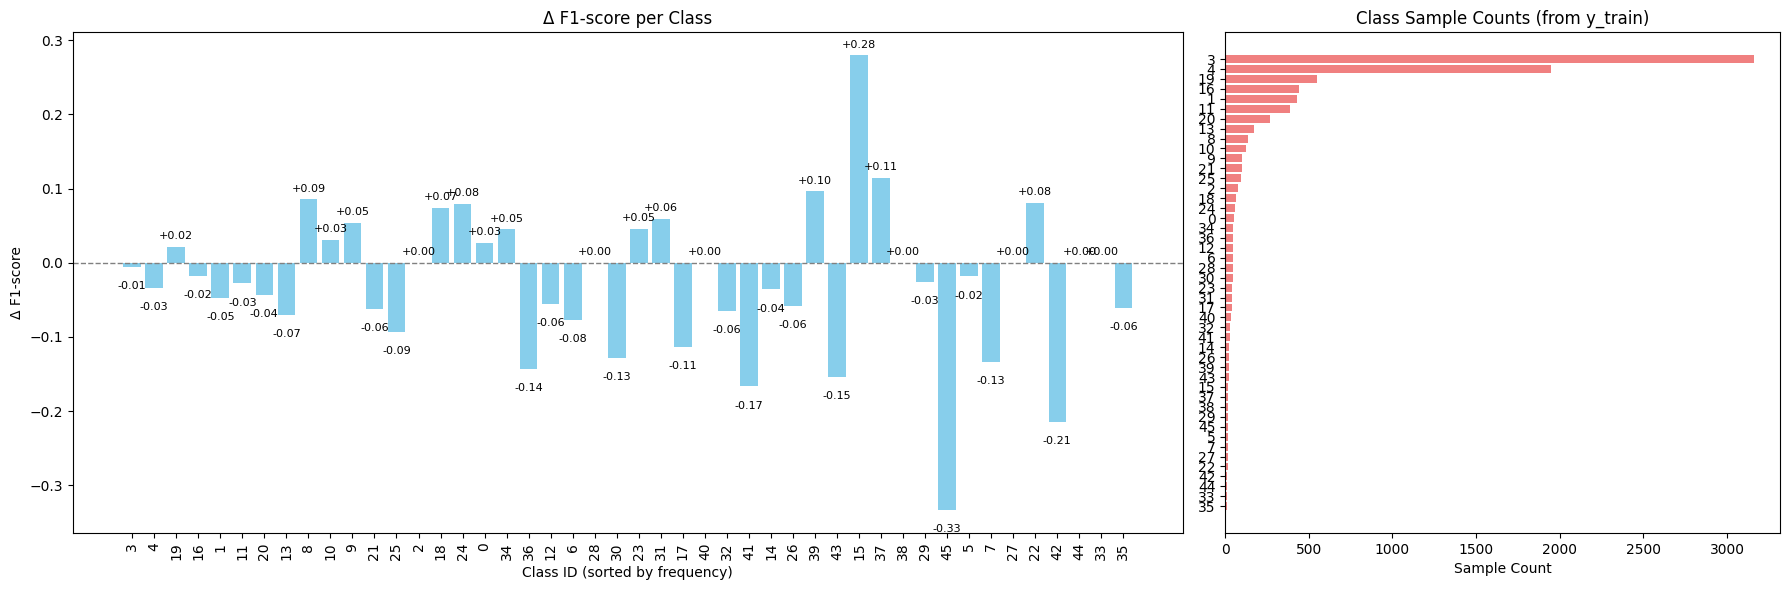

In [310]:
sorted_class_ids = f1_sorted.index.tolist()
index = range(len(f1_sorted))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})

ax1.bar(index, f1_sorted["delta"], color='skyblue')
ax1.axhline(0, color='gray', linewidth=1, linestyle='--')
ax1.set_title("Δ F1-score per Class")
ax1.set_xlabel("Class ID (sorted by frequency)")
ax1.set_ylabel("Δ F1-score")
ax1.set_xticks(index)
ax1.set_xticklabels([str(cls_id) for cls_id in sorted_class_ids], rotation=90)

for i, d in enumerate(f1_sorted["delta"]):
    offset = 0.01 if d >= 0 else -0.03
    ax1.text(i, d + offset, f"{d:+.2f}", ha='center', fontsize=8)

ax2.barh(index, f1_sorted["sample_count"], color='lightcoral')
ax2.set_yticks(index)
ax2.set_yticklabels([str(cls_id) for cls_id in sorted_class_ids])
ax2.invert_yaxis()
ax2.set_xlabel("Sample Count")
ax2.set_title("Class Sample Counts (from y_train)")

plt.tight_layout()
plt.show()

#5.회고

lstm 모델의 성능이 높게 나오지 않고 tf-idf 기반 ML 또는 1dconv가 성능이 상대적으로 높다.

토픽을 분류하는 다음의 문제에서 순차적인 문장의 의미를 이해하기보단 특정 단어 위주의 강한 신호를 포착하는 것이 더 중요한 학습 신호로 판단된다.

확인하기 위해 tf-idf matrix를 desne layer에 입력시켰을 때 성능이 가장 좋았다. 시퀀셜한 패턴이나 단어순서를 고려한 문맥보다는 특정 단어의 포착이 중요한 태스크로 판단된다.

vocab size를 키웠을 때 기대되는 영향은 다음과 같다.
1. 빈도수가 적은 단어도 포함되어서 학습에 노이즈로 작용할 수 있는 점
2. tf-idf 기준 sparse해져서 상대적으로 중요한 단어의 비중이 낮아져 추상화 능력 감소 및 일반화 어려움 가능성
3. 마찬가지로 차원 증가로 인한 overfit 가능성 증가
4. 소수 클래스의 중요 단어가 빈도수 필터링에서 걸러지지 않고 학습에 사용될 수 있는 점

vocab 5000과 None(30000)을 비교해 보았을 때 성능은 소폭 하락하였다.

위의 그래프는 train의 클래스 별 샘플 수로 정렬한 vocab size에 따른 f1 score 변화이다. 일단 소수 클래스에서 표현력 증가로 분류성능이 증가한 점이 15,37에서 관찰되었으나 오히려 45,42에서 더 큰폭으로 하락하였다.

샘플 수에 따른 f1 score 경향성은 뚜렷하게 관찰되지 않으며 전체적으로 4번의 학습성능증가보다 1~3의 단점이 더 부각되는 것으로 판단된다.

보다 정확한 판단을 위해서는 두 실험군에서 예측이 다른 test sample을 비교해보는 것이 좋을 것 같다.

또한 소수 클래스의 rare word가 포함되고 class_weight를 사용해여 sample level에서 보정하더라도, rare word가 일반화 되기에는 샘플 수가 부족하여 학습이 잘 되지 않을 가능성이 있다.

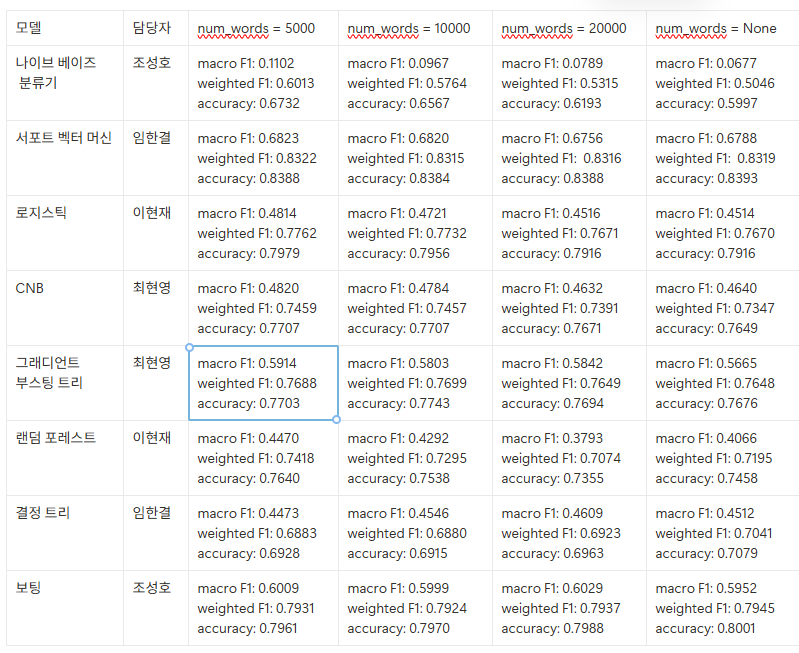

grbt : tf-idf 같은 sparse한 입력에서 tree 기반 모델은 feature간 interaction을 명시적으로 학습하지 못하는 단점이 분명하다. tree는 기본적으로 한 featrue기준으로 information gain을 기준으로 선택하기 때문에 대부분이 0인 sparse feature에서는 유의미한 split이 어렵고 분기기준이 제한적이라 학습 성능이 저하될 수 있다. 또한 sparse한 feature에서 결정트리는 overfitting 위험이 더 크다.

cnb : naive bayes classifier 보다는 클래스불균형이 직접 반영되는 사전확률에 직접 영향을 받지 않는다는 점에서 클래스불균형 문제에서 더 강한 모습을 보이나 베이지안 모델은 각 토큰을 조건부 독립으로 가정하고 확률을 계산하기 때문에 문맥 정보나 토큰 간 상호작용을 반영하지 못한다는 근본적인 한계가 존재한다.

SVM(linear kernel) : 결정경계를 서포트벡터를 통해 직접 최적화한다는 점에서 spaser한 행렬에서도 중요 feature만 선택적으로 활용 가능하다. 또한 고차원의 sparse한 tf-idf 행렬에서는 오히려 저차원 공간보다 선형 분리가 용이해, SVM이 더욱 효과적으로 작동한다. 고차원 행렬이라서 rbf보다 성능이 잘 나왔다.

#6. SVM

In [316]:
from sklearn.svm import SVC, LinearSVC

In [311]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
x_train_decode = decoding(x_train)
x_test_decode = decoding(x_test)
dtmvector = CountVectorizer()

x_train_dtm = dtmvector.fit_transform(x_train_decode)
x_test_dtm = dtmvector.transform(x_test_decode)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [317]:
model = LinearSVC(class_weight='balanced', C=1.0, max_iter=10000)
model.fit(x_train_tfidf, y_train)

# 평가
y_pred = model.predict(x_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.77      0.79       105
           2       0.77      0.85      0.81        20
           3       0.95      0.92      0.94       813
           4       0.89      0.87      0.88       474
           5       0.33      0.20      0.25         5
           6       0.82      1.00      0.90        14
           7       0.75      1.00      0.86         3
           8       0.61      0.71      0.66        38
           9       0.81      1.00      0.89        25
          10       0.82      0.93      0.88        30
          11       0.69      0.76      0.72        83
          12       0.62      0.62      0.62        13
          13       0.59      0.73      0.65        37
          14       0.29      1.00      0.44         2
          15       0.60      0.33      0.43         9
          16       0.80      0.79      0.79        99
          17       0.62    

In [320]:
for i in [1.0, 500, 1000]:
  model = LinearSVC(
      C=i,
      penalty='l1',
      dual=False,
      max_iter=10000,
      class_weight='balanced'
  )
  model.fit(x_train_tfidf, y_train)

  # 평가
  y_pred = model.predict(x_test_tfidf)
  print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.86      0.80      0.83       105
           2       0.72      0.90      0.80        20
           3       0.95      0.89      0.92       813
           4       0.88      0.85      0.86       474
           5       1.00      0.40      0.57         5
           6       0.76      0.93      0.84        14
           7       0.60      1.00      0.75         3
           8       0.59      0.71      0.64        38
           9       0.76      1.00      0.86        25
          10       0.78      0.97      0.87        30
          11       0.74      0.73      0.74        83
          12       0.38      0.69      0.49        13
          13       0.59      0.81      0.68        37
          14       0.22      1.00      0.36         2
          15       0.60      0.33      0.43         9
          16       0.77      0.80      0.78        99
          17       0.50    

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.69      0.69      0.69       105
           2       0.70      0.70      0.70        20
           3       0.90      0.89      0.90       813
           4       0.81      0.83      0.82       474
           5       0.00      0.00      0.00         5
           6       0.88      1.00      0.93        14
           7       0.67      0.67      0.67         3
           8       0.58      0.74      0.65        38
           9       0.88      0.84      0.86        25
          10       0.83      0.80      0.81        30
          11       0.62      0.70      0.66        83
          12       0.35      0.46      0.40        13
          13       0.54      0.59      0.56        37
          14       0.33      1.00      0.50         2
          15       0.67      0.44      0.53         9
          16       0.63      0.70      0.66        99
          17       0.67    

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [322]:
model = LinearSVC(max_iter=10000)
model.fit(x_train_tfidf, y_train)

# 평가
y_pred = model.predict(x_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.76      0.80      0.78       105
           2       0.73      0.80      0.76        20
           3       0.93      0.95      0.94       813
           4       0.83      0.89      0.86       474
           5       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14
           7       1.00      0.67      0.80         3
           8       0.71      0.71      0.71        38
           9       0.81      0.88      0.85        25
          10       0.90      0.90      0.90        30
          11       0.65      0.75      0.69        83
          12       0.88      0.54      0.67        13
          13       0.62      0.62      0.62        37
          14       0.67      1.00      0.80         2
          15       0.67      0.22      0.33         9
          16       0.72      0.78      0.75        99
          17       0.88    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [323]:
model = LinearSVC(
      C=1.0,
      penalty='l1',
      dual=False,
      max_iter=10000,
  )
model.fit(x_train_tfidf, y_train)

# 평가
y_pred = model.predict(x_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.81      0.83      0.82       105
           2       0.68      0.75      0.71        20
           3       0.93      0.94      0.94       813
           4       0.84      0.90      0.87       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      1.00      1.00         3
           8       0.72      0.74      0.73        38
           9       0.82      0.92      0.87        25
          10       0.90      0.90      0.90        30
          11       0.68      0.76      0.72        83
          12       1.00      0.46      0.63        13
          13       0.66      0.68      0.67        37
          14       0.67      1.00      0.80         2
          15       0.50      0.11      0.18         9
          16       0.76      0.82      0.79        99
          17       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


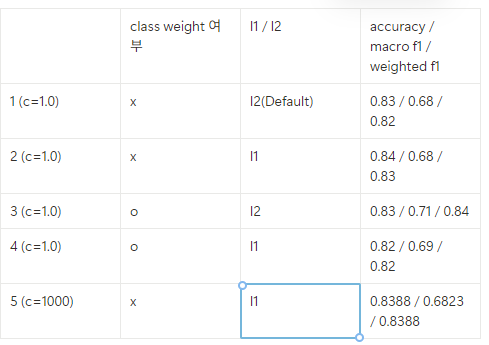

class imbalance를 보정하고 l2가 성능이 가장 좋았다. class_weight와 l1을 사용할 경우 c=500, c=1000에서는 수렴하지 않았다.

클래스 웨이트를 사용하지 않을 경우 소수 클래스는 모델이 잘 학습하지 못하지만(macro f1 score),
L1 정규화는 다수 클래스에 중요한 feature만 선택적으로 남기기 때문에 최소한 다수 클래스에 대해서는 성능이 좋은 압축된 모델을 만들 수 있다.

반면, 클래스 웨이트를 사용할 경우, 소수 클래스에 대한 학습 기회가 생기지만,
L1 정규화는 클래스 구분 없이 중요하지 않다고 판단한 feature를 제거해버리기 때문에, 소수 클래스에 결정적인 feature까지 삭제되어 오히려 학습을 방해하게 된다.